In [8]:
import pandas as pd
import numpy as np 
from AISDataManager import AISDataManager

#make object of AIS data manager
aISDM = AISDataManager()

In [20]:
lAData,retVal = aISDM.load_data_from_csv("./Data/AIS_2017_LA/AIS_2017_Zone_11/AIS_2017_01_Zone11.csv")
vesselList = aISDM.get_list_of_unique_mmsi(lAData)
#get data for individual vessel
#5th gave good readings for month 01 of Zone 11 of 2017
#we can choose any vessel form list of vessel
oneVesselData = aISDM.filter_based_on_mmsi(lAData,vesselList[5])
print(oneVesselData.head())
print(lAData.head())
print(oneVesselData.shape)
print(oneVesselData['LAT'].min())
print(oneVesselData['LAT'].max())
print(oneVesselData['LON'].min())
print(oneVesselData['LON'].max())

#formate the date and time
oneVesselDataSorted = aISDM.format_time(oneVesselData,'DateTime')
#sort it in increasing order of time
oneVesselDataSorted = oneVesselDataSorted.sort_values(by='DateTime')

          MMSI         BaseDateTime       LAT        LON   SOG   COG  Heading  \
5    538090208  2017-01-01T00:03:02  32.04638 -117.63745  11.8 -60.6    346.0   
37   538090208  2017-01-01T00:04:14  32.05027 -117.63833  11.7 -61.6    346.0   
52   538090208  2017-01-01T00:00:14  32.03725 -117.63553  11.8 -60.6    347.0   
134  538090208  2017-01-01T00:01:53  32.04258 -117.63663  11.8 -59.6    347.0   
139  538090208  2017-01-01T00:05:22  32.05393 -117.63917  11.7 -60.6    347.0   

    VesselName  IMO CallSign  VesselType                  Status  Length  \
5          NaN  NaN      NaN         NaN  under way using engine     NaN   
37         NaN  NaN      NaN         NaN  under way using engine     NaN   
52         NaN  NaN      NaN         NaN  under way using engine     NaN   
134        NaN  NaN      NaN         NaN  under way using engine     NaN   
139        NaN  NaN      NaN         NaN  under way using engine     NaN   

     Width  Draft  Cargo  
5      NaN    NaN    NaN  
37

In [21]:
print(oneVesselDataSorted.head())
print(oneVesselDataSorted.shape)

          MMSI         BaseDateTime       LAT        LON   SOG   COG  Heading  \
52   538090208  2017-01-01T00:00:14  32.03725 -117.63553  11.8 -60.6    347.0   
134  538090208  2017-01-01T00:01:53  32.04258 -117.63663  11.8 -59.6    347.0   
5    538090208  2017-01-01T00:03:02  32.04638 -117.63745  11.8 -60.6    346.0   
37   538090208  2017-01-01T00:04:14  32.05027 -117.63833  11.7 -61.6    346.0   
139  538090208  2017-01-01T00:05:22  32.05393 -117.63917  11.7 -60.6    347.0   

    VesselName  IMO CallSign  VesselType                  Status  Length  \
52         NaN  NaN      NaN         NaN  under way using engine     NaN   
134        NaN  NaN      NaN         NaN  under way using engine     NaN   
5          NaN  NaN      NaN         NaN  under way using engine     NaN   
37         NaN  NaN      NaN         NaN  under way using engine     NaN   
139        NaN  NaN      NaN         NaN  under way using engine     NaN   

     Width  Draft  Cargo            DateTime  
52     Na

In [22]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

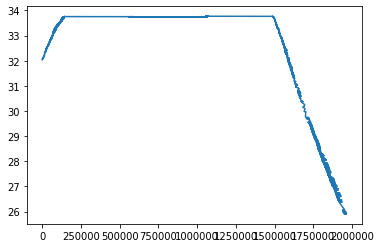

In [23]:
plt.plot(oneVesselDataSorted['LAT'])

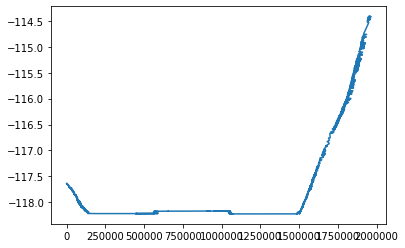

In [24]:
plt.plot(oneVesselDataSorted['LON'])

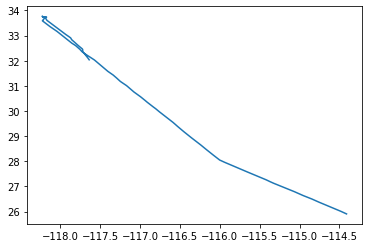

In [25]:
plt.plot(oneVesselDataSorted['LON'],oneVesselDataSorted['LAT'])

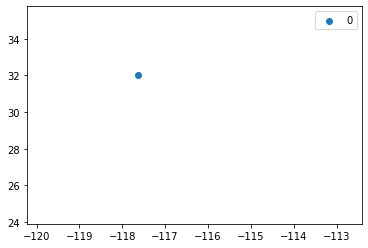

In [26]:
# First set up the figure, the axis,
# and the plot element we want to animate
fig, ax = plt.subplots()

lonValues = oneVesselDataSorted['LON']
latValues = oneVesselDataSorted['LAT']

ax.set_xlim((oneVesselDataSorted['LON'].min(), oneVesselDataSorted['LON'].max()))
ax.set_ylim((oneVesselDataSorted['LAT'].min(), oneVesselDataSorted['LAT'].max()))

def animate(i):
#     ax.set_xlim((-10, 210))
#     ax.set_ylim((-10, 210))
#     ax.scatter(i, i)
    ax.cla()
    ax.set_xlim((oneVesselDataSorted['LON'].min()-2, oneVesselDataSorted['LON'].max()+2))
    ax.set_ylim((oneVesselDataSorted['LAT'].min()-2, oneVesselDataSorted['LAT'].max()+2))
    ax.scatter(lonValues.iloc[i],latValues.iloc[i],label=i)
    ax.legend()
    
anim = animation.FuncAnimation(fig, animate,frames=oneVesselDataSorted.shape[0], interval=100)

In [27]:
HTML(anim.to_html5_video())

In [ ]:
aDMTest.save_data_to_csv(oneVesselDataSorted,"./Data/AIS_2017_LA/AIS_2017_01_Zone11/AIS_ASCII_by_UTM_Month/2017_v2/AIS_2017_01_Zone11_5.csv")